In [1]:
import statistics as stats

In [12]:
data = [1,2,3,4,4,4,5,5,5,6]

In [13]:
stats.mean(data)

3.9

In [14]:
stats.median(data)

4.0

In [15]:
stats.multimode(data)

[4, 5]

In [18]:
from scipy import stats
print(stats.mode(data, keepdims=True))

ModeResult(mode=array([4]), count=array([3]))


In [30]:
import numpy as np
from scipy import stats
data = np.array([5, 7, 7, 9, 10])
print(np.mean(data))
print(np.median(data))
print(stats.mode(data))

7.6
7.0
ModeResult(mode=np.int64(7), count=np.int64(2))


In [40]:
import numpy as np
import statistics as stats
data = np.array([12, 15, 15, 15, 18, 18, 18, 20, 22])
mean = np.mean(data)
median = np.median(data)
print(stats.multimode(data))

if mean > median:
    print("Right Skewed")
elif mean < median:
    print("Left Skewed")
else:
    print("Symmetric")

[np.int64(15), np.int64(18)]
Left Skewed


In [53]:
import numpy as np

data = np.array([40, 42, 39, 41, 40, 300, 38, 41, 40])
# sort_data = np.sort(data)
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)  # median
q3 = np.percentile(data, 75)

print(q1, q2, q3)

iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
higher_bound = q3 + 1.5 * iqr

print(lower_bound)
print(higher_bound)
print(sort_data)

outliers = sort_data[(sort_data < lower_bound) | (sort_data > higher_bound)]
print("Outliers:", outliers)

clean_data = sort_data[(sort_data >= lower_bound) & (sort_data <= higher_bound)]
print("Clean data:", clean_data)

40.0 40.0 41.0
38.5
42.5
[ 38  39  40  40  40  41  41  42 300]
Outliers: [ 38 300]
Clean data: [39 40 40 40 41 41 42]


<Axes: >

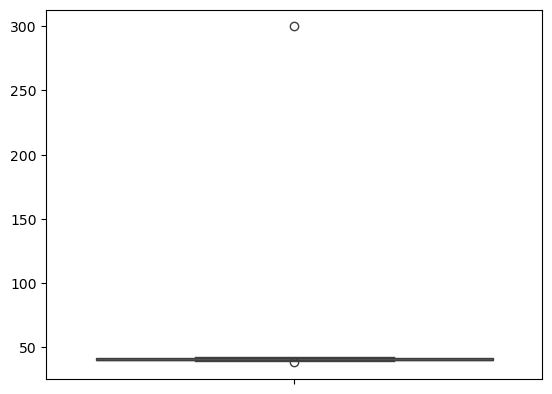

In [56]:
import pandas as pd
import seaborn as sns
data = pd.array([40, 42, 39, 41, 40, 300, 38, 41, 40])

sns.boxplot(data=data)

[38 39 40 40 41 41 42]


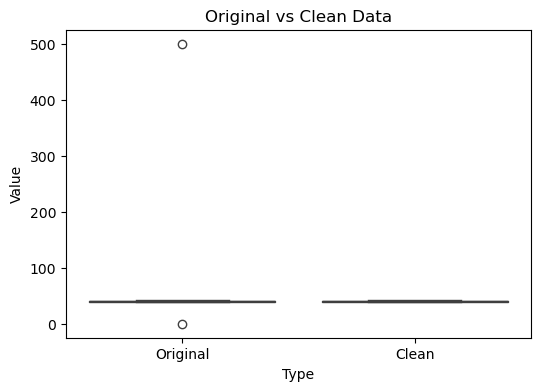

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = np.array([0,38, 39, 40, 40, 41, 41, 42, 500])

# Compute IQR
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = data[(data < lower) | (data > upper)]
clean_data = data[(data >= lower) & (data <= upper)]
print(clean_data)

# Plot
df = pd.DataFrame({
    "Value": np.concatenate([data, clean_data]),
    "Type": ["Original"] * len(data) + ["Clean"] * len(clean_data)
})

plt.figure(figsize=(6, 4))
sns.boxplot(x="Type", y="Value", data=df)
plt.title("Original vs Clean Data")
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("/Users/kishorecheruku/Documents/Mathmatics/6_box_plot/scores_multiple_subjects.xlsx")
data

,Name,MathScore,EnglishScore,HistoryScore
0,Fatima,23,32,45
1,Surya,33,29,22
2,Aarav,45,51,55
3,Norberto,45,56,48
4,Ananya,54,64,43
5,Jessica,67,75,60
6,Maria,68,78,45
7,Priyanka,78,85,65
8,Abdul,89,80,68
9,Kiran,91,94,81


         Subject  Score
0      MathScore     23
1      MathScore     33
2      MathScore     45
3      MathScore     45
4      MathScore     54
5      MathScore     67
6      MathScore     68
7      MathScore     78
8      MathScore     89
9      MathScore     91
10  EnglishScore     32
11  EnglishScore     29
12  EnglishScore     51
13  EnglishScore     56
14  EnglishScore     64
15  EnglishScore     75
16  EnglishScore     78
17  EnglishScore     85
18  EnglishScore     80
19  EnglishScore     94
20  HistoryScore     45
21  HistoryScore     22
22  HistoryScore     55
23  HistoryScore     48
24  HistoryScore     43
25  HistoryScore     60
26  HistoryScore     45
27  HistoryScore     65
28  HistoryScore     68
29  HistoryScore     81


/var/folders/39/mvl07frs18l0n9lf92sybq1r0000gn/T/ipykernel_20735/3147600070.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


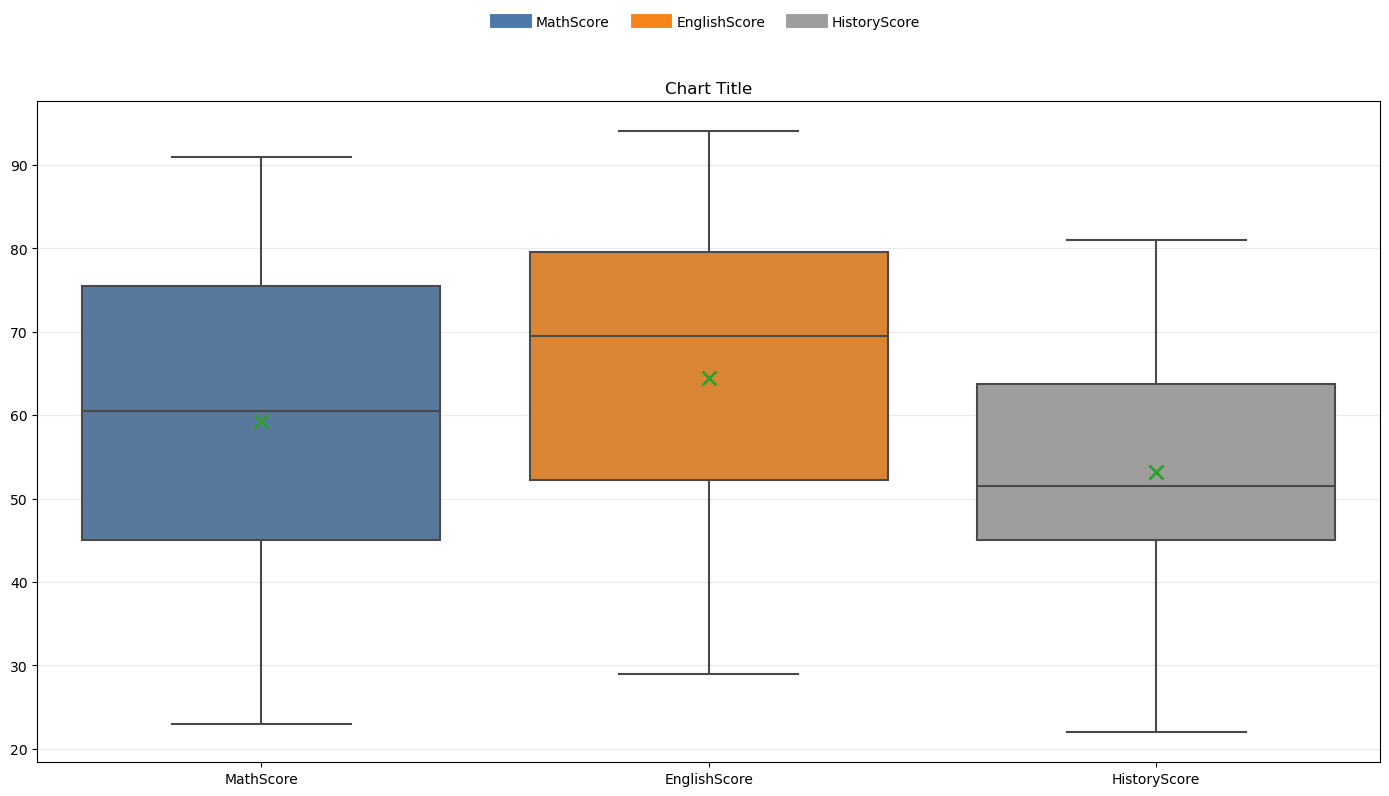

In [9]:
cols = ['MathScore', 'EnglishScore', 'HistoryScore']
d = data[cols].melt(var_name="Subject", value_name="Score").dropna()
print(d)
plt.figure(figsize=(14,8))

ax = sns.boxplot(
    data=d,
    x="Subject",
    y="Score",
    width=0.8,
    showmeans=True,                    # <-- shows mean marker
    meanprops={                        # <-- mean marker style (X)
        "marker": "x",
        "markeredgewidth": 2,
        "markersize": 10,
    },
    palette=["#4C78A8", "#F58518", "#9E9E9E"],  # blue, orange, gray
    linewidth=1.5
)

# Make boxes filled (Excel-like)
for patch in ax.artists:
    patch.set_alpha(0.9)

# Clean look similar to Excel
ax.set_title("Chart Title")
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(axis="y", alpha=0.25)

# Create a legend like the screenshot
handles = [
    plt.Line2D([0], [0], color="#4C78A8", lw=10),
    plt.Line2D([0], [0], color="#F58518", lw=10),
    plt.Line2D([0], [0], color="#9E9E9E", lw=10),
]
ax.legend(handles, cols, loc="upper center", ncol=3, frameon=False, bbox_to_anchor=(0.5, 1.15))

plt.tight_layout()
plt.show()

In [10]:
df = pd.DataFrame({
    "MathScore": [80, 85, 90],
    "EnglishScore": [75, 78, 82],
    "HistoryScore": [70, 72, 76]
})

In [14]:
df.melt(var_name="Subject", value_name="Marks")

,Subject,Marks
0,MathScore,80
1,MathScore,85
2,MathScore,90
3,EnglishScore,75
4,EnglishScore,78
5,EnglishScore,82
6,HistoryScore,70
7,HistoryScore,72
8,HistoryScore,76


<Axes: xlabel='Subject', ylabel='Marks'>

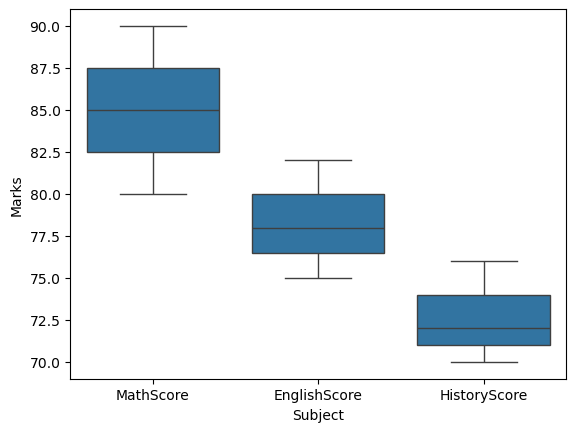

In [17]:
sns.boxplot(x="Subject", y="Marks", data=df.melt(var_name="Subject", value_name="Marks"))

In [20]:
df = pd.read_excel('/Users/kishorecheruku/Documents/Mathmatics/7_outlier_detection_using_iqr_boxplot/region_wise_sales.xlsx')
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [23]:
labels = df.Region.unique()

In [33]:
plot_data = [df['Sales'][df['Region'] == label].values for label in labels]

In [34]:
plot_data

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896]),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895]),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387])]

In [45]:
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


<Axes: xlabel='Region', ylabel='Sales'>

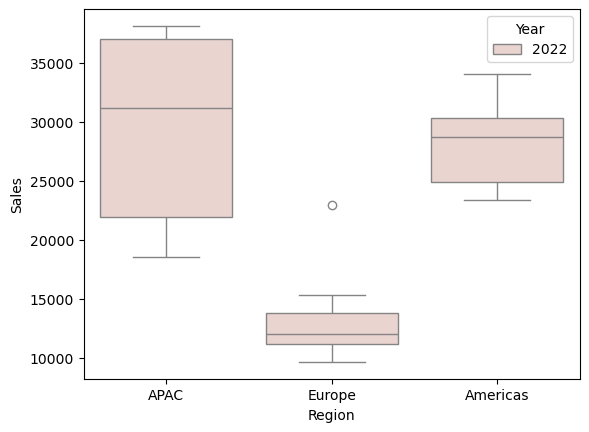

In [49]:
sns.boxplot(data=df, x=df.Region, y=df.Sales, hue='Year')